## Text Classification


---
Clarisa Hasya Y - 130174256


In [1]:
pip install Sastrawi

In [2]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **DataSet**

Dataset Review Female Daily

-1 : Negative

0 : Netral

1 : Positive

In [3]:
df = pd.read_csv('femaledaily.csv', encoding= 'unicode_escape')
df.head()

,review_id,review_text,label
0,9462,Tekstur serum ini kental dan cepat meresap ser...,1
1,16327,Saya sangat menyukai produk perawatan wajah ya...,1
2,155658,harga murah bukan berarti murahan berkualitas ...,1
3,82508,Awalnya saya bingung membeli toner lemon atau ...,1
4,27306,Sublock ini lebih ditujukan untuk kulit bermin...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    3080 non-null   object
 1   review_text  3080 non-null   object
 2   label        3080 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 72.3+ KB


Text(0.5, 0, 'Label')

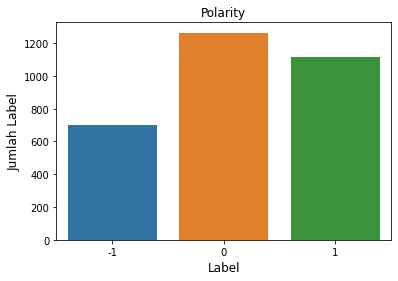

In [5]:
sns.countplot(x='label', data=df)
plt.title('Polarity')
plt.ylabel('Jumlah Label', fontsize=12)
plt.xlabel('Label', fontsize=12)

In [6]:
df['label'].value_counts()

 0    1264
 1    1118
-1     698
Name: label, dtype: int64

# **PreProcessing**

In [7]:
def cleaning(df):    
    df = re.sub(r"\n", " ",df)
    df = re.sub(r"\r", " ",df)
    df = re.sub(r"\u00a0", " ",df) 
    df = re.sub(r'''(?i)\b((?:https|http?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', "",df)
    df = re.sub(r"[-_<>*#$@()\"/%&;:<>{}`+=~|.!?,']", " ", df) #hapus simbol    
    df = re.sub(r"amp", " ",df)
    df = re.sub(r"gt", " ",df)
    df = re.sub(r"lt", " ",df)
    df = re.sub(r"quot", " ",df)
    df = re.sub(r"br", " ",df)
    df = re.sub(r"nbsp", " ",df)
    df = re.sub(r"apos", " ",df)
    df = re.sub(r"u00a0", " ",df)
    df = re.sub(r"u00a02", " ",df)
    df = re.sub(r"[^a-zA-Z]", " ",df) # menghilangkan angka
    df = re.sub("\s\s+", " ",df) # menghilangkan double spasi
    df = df.lower() # lower case
    return df

In [8]:
df['review_text'] = df['review_text'].apply(cleaning)
df.head()

,review_id,review_text,label
0,9462,tekstur serum ini kental dan cepat meresap ser...,1
1,16327,saya sangat menyukai produk perawatan wajah ya...,1
2,155658,harga murah bukan berarti murahan berkualitas ...,1
3,82508,awalnya saya bingung membeli toner lemon atau ...,1
4,27306,sublock ini lebih ditujukan untuk kulit bermin...,1


# **TF IDF**

In [9]:
def tfidf(X_train, X_test, y_train, y_test):
    vectorizer = TfidfVectorizer(max_features=1000)
    X_train = vectorizer.fit_transform(X_train).toarray()
    X_test = vectorizer.transform(X_test).toarray()

    #get feature names
    terms = vectorizer.get_feature_names()
    
    return X_train, X_test, y_train, y_test, terms

In [10]:
X_train8020, X_test8020, y_train8020, y_test8020 = train_test_split(df['review_text'], df['label'], test_size = 0.2, random_state = 9)
X_train7030, X_test7030, y_train7030, y_test7030 = train_test_split(df['review_text'], df['label'], test_size = 0.3, random_state = 9)

In [11]:
data_train8020 = pd.DataFrame({'review_text' : np.array(X_train8020),
                               'label' : np.array(y_train8020)})
data_test8020 = pd.DataFrame({'review_text' : np.array(X_test8020),
                               'label' : np.array(y_test8020)})
data_train7030 = pd.DataFrame({'review_text' : np.array(X_train7030),
                               'label' : np.array(y_train7030)})
data_test7030 = pd.DataFrame({'review_text' : np.array(X_test7030),
                               'label' : np.array(y_test7030)})

In [12]:
X_train8020, X_test8020, y_train8020, y_test8020, terms8020 = tfidf(X_train8020, X_test8020, y_train8020, y_test8020)
X_train7030, X_test7030, y_train7030, y_test7030, terms7030 = tfidf(X_train7030, X_test7030, y_train7030, y_test7030)

In [13]:
terms8020

['abu',
 'ada',
 'adalah',
 'agak',
 'agar',
 'aha',
 'ai',
 'air',
 'aja',
 'ajaib',
 'ak',
 'akan',
 'akhir',
 'akhirnya',
 'akibat',
 'aktivitas',
 'aku',
 'alami',
 'alas',
 'alias',
 'alkohol',
 'alkoholnya',
 'aman',
 'anak',
 'and',
 'anda',
 'andalan',
 'aneh',
 'ang',
 'antara',
 'anti',
 'apa',
 'apakah',
 'apalagi',
 'apapun',
 'aplikasikan',
 'aqua',
 'area',
 'aroma',
 'aromanya',
 'asam',
 'aslinya',
 'atas',
 'atau',
 'awal',
 'awalnya',
 'awet',
 'baca',
 'badan',
 'bagaimana',
 'bagi',
 'bagian',
 'bagus',
 'bahan',
 'bahannya',
 'bahkan',
 'bahwa',
 'baik',
 'baiknya',
 'bali',
 'balm',
 'banget',
 'bangun',
 'banyak',
 'baru',
 'basah',
 'bau',
 'baunya',
 'bawa',
 'bawah',
 'bb',
 'beauty',
 'bebas',
 'beberapa',
 'beda',
 'bedak',
 'begitu',
 'bekas',
 'bekerja',
 'beli',
 'belum',
 'benar',
 'bener',
 'bening',
 'bentuk',
 'bentuknya',
 'berair',
 'beraktivitas',
 'beralih',
 'berani',
 'berantakan',
 'berapa',
 'berarti',
 'berat',
 'berbagai',
 'berbahan',
 'ber

In [14]:
terms7030

['abu',
 'ada',
 'adalah',
 'agak',
 'agar',
 'aging',
 'aha',
 'ai',
 'air',
 'aja',
 'ajaib',
 'ak',
 'akan',
 'akhir',
 'akhirnya',
 'akibat',
 'aktivitas',
 'aku',
 'alami',
 'alas',
 'alias',
 'alkohol',
 'alkoholnya',
 'aman',
 'anak',
 'anda',
 'andalan',
 'aneh',
 'ang',
 'antara',
 'anti',
 'apa',
 'apakah',
 'apalagi',
 'apapun',
 'aplikasikan',
 'aqua',
 'area',
 'aroma',
 'aromanya',
 'asam',
 'aslinya',
 'atas',
 'atau',
 'awal',
 'awalnya',
 'awet',
 'baca',
 'badan',
 'bagaimana',
 'bagi',
 'bagian',
 'bagus',
 'bahan',
 'bahannya',
 'bahkan',
 'bahwa',
 'baik',
 'baiknya',
 'bali',
 'balm',
 'banget',
 'bangun',
 'banyak',
 'baru',
 'basah',
 'bau',
 'baunya',
 'bawa',
 'bawah',
 'bb',
 'beauty',
 'bebas',
 'beberapa',
 'beda',
 'bedak',
 'begitu',
 'bekas',
 'bekerja',
 'beli',
 'belum',
 'benar',
 'bener',
 'bening',
 'benjolan',
 'bentuk',
 'bentuknya',
 'berair',
 'beraktivitas',
 'beralih',
 'berani',
 'berantakan',
 'berapa',
 'berarti',
 'berat',
 'berbagai',
 'b

In [16]:
X_train8020.shape

(2464, 1000)

In [17]:
X_test8020.shape

(616, 1000)

In [18]:
X_train7030.shape

(2156, 1000)

In [19]:
X_test7030.shape

(924, 1000)

# **Classification**

In [20]:
def classification(X_train, X_test, y_train, y_test):
    %%time
    # clf = MultinomialNB()
    clf = SVC(kernel='linear', gamma=0.1, C=1.0)
    # clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test) # predict data test
    pred = clf.predict(X_train) # predict data train
    return y_pred, pred

In [21]:
def confMatrix(y_test, y_pred):
    print(confusion_matrix(y_test, y_pred))

In [22]:
def classReport(y_test, y_pred):    
    print(classification_report(y_test, y_pred))

In [23]:
y_pred8020, pred8020 = classification(X_train8020, X_test8020, y_train8020, y_test8020)
y_pred7030, pred7030 = classification(X_train7030, X_test7030, y_train7030, y_test7030)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.58 µs
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs


**80 : 20**

In [24]:
confMatrix(y_test8020, y_pred8020)

[[ 85  27  28]
 [ 12 181  67]
 [ 20  52 144]]


In [25]:
print(round((accuracy_score(y_test8020, y_pred8020) * 100) , 2))

66.56


In [26]:
print(round((accuracy_score(y_train8020, pred8020) * 100), 2))

82.79


In [27]:
classReport(y_test8020, y_pred8020)

              precision    recall  f1-score   support

          -1       0.73      0.61      0.66       140
           0       0.70      0.70      0.70       260
           1       0.60      0.67      0.63       216

    accuracy                           0.67       616
   macro avg       0.68      0.66      0.66       616
weighted avg       0.67      0.67      0.67       616



**70 : 30**

In [28]:
confMatrix(y_test7030, y_pred7030)

[[123  44  37]
 [ 26 280  68]
 [ 39  92 215]]


In [29]:
print(round((accuracy_score(y_test7030, y_pred7030) * 100) ,2))

66.88


In [30]:
print(round((accuracy_score(y_train7030, pred7030) * 100) , 2))

83.26


In [31]:
classReport(y_test7030, y_pred7030)

              precision    recall  f1-score   support

          -1       0.65      0.60      0.63       204
           0       0.67      0.75      0.71       374
           1       0.67      0.62      0.65       346

    accuracy                           0.67       924
   macro avg       0.67      0.66      0.66       924
weighted avg       0.67      0.67      0.67       924



In [32]:
data_train8020['prediction'] = pred8020
data_test8020['prediction'] = y_pred8020
data_train7030['prediction'] = pred7030
data_test7030['prediction'] = y_pred7030

In [33]:
data_train8020

,review_text,label,prediction
0,butiran scrub sangat halus teksturnya juga san...,0,0
1,tempat produk sangat populer overhype saya ras...,0,-1
2,lulur bali ini murah banget sayang isinya keci...,0,0
3,saya membeli ini karena saya sedang mencari pr...,1,1
4,ini semua dalam satu pembersih pada awalnya sa...,1,1
...,...,...,...
2459,setelah dioleskan ke wajah terasa sedikit pana...,-1,-1
2460,saya pakai selama sebulan wow banget pertama k...,1,1
2461,setelah kamu membuat scrub ini wajahmu terasa ...,0,0
2462,ekstrak herbal kiehl s toner bebas alkohol say...,1,1


In [34]:
data_test8020

,review_text,label,prediction
0,ukurannya lumayan gede wanginya segar untuk me...,-1,-1
1,dulu ketika kulit saya berminyak saya sangat s...,1,1
2,saya tidak pernah cocok menggunakan toner apa ...,1,-1
3,menurut saya produk nivea ini memiliki tekstur...,0,0
4,pertama kali mengenal wet n wild megalast lips...,0,0
...,...,...,...
611,fungsinya sebagai penyegar setelah dibersihkan...,1,1
612,ah nostalgia sekali saat mereview lotion ini i...,-1,1
613,coba dulu lotion bening ini kulit terasa kerin...,1,1
614,saya tidak suka serum pelembab vitamin dari to...,-1,0


In [35]:
data_train7030

,review_text,label,prediction
0,hydraluron ini cukup baik untuk wajah normal h...,1,-1
1,beli frank langsung dari website itu susah ban...,0,0
2,saya sangat suka aroma coklat bikin rileks h i...,0,0
3,ini adalah serum yang ingin saya beli dalam uk...,1,0
4,saya baru mencoba produk skii selama sebulan k...,1,-1
...,...,...,...
2151,setelah dioleskan ke wajah terasa sedikit pana...,-1,-1
2152,saya pakai selama sebulan wow banget pertama k...,1,1
2153,setelah kamu membuat scrub ini wajahmu terasa ...,0,0
2154,ekstrak herbal kiehl s toner bebas alkohol say...,1,1


In [36]:
data_test7030

,review_text,label,prediction
0,ukurannya lumayan gede wanginya segar untuk me...,-1,-1
1,dulu ketika kulit saya berminyak saya sangat s...,1,1
2,saya tidak pernah cocok menggunakan toner apa ...,1,-1
3,menurut saya produk nivea ini memiliki tekstur...,0,0
4,pertama kali mengenal wet n wild megalast lips...,0,0
...,...,...,...
919,tidak membuat bibir kering asalkan rajin meng...,0,0
920,awalnya saya beli ini karena melihat diskon di...,-1,-1
921,sambutan dari blogger sangat bagus jadi saya m...,-1,1
922,oke sunscreen ini murah simak ulasannya banyak...,0,-1


In [37]:
data_train8020.to_csv('data_train8020.csv')
data_test8020.to_csv('data_test8020.csv')
data_train7030.to_csv('data_train7030.csv')
data_test7030.to_csv('data_test7030.csv')